In [ ]:
!kaggle datasets download awsaf49/brats20-dataset-training-validation

Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0
100%|██████████████████████████████████████▉| 4.15G/4.16G [00:06<00:00, 816MB/s]
100%|███████████████████████████████████████| 4.16G/4.16G [00:06<00:00, 738MB/s]


In [2]:
!unzip brats20-dataset-training-validation.zip "BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_0[0-5][0-9]/*"

Archive:  brats20-dataset-training-validation.zip
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_flair.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_seg.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_t1.nii  
  in

#### Dataset Structure
The Brain Tumor Segmentation (BraTS) 2020 dataset is a collection of multimodal Magnetic Resonance Imaging (MRI) scans used for the segmentation of brain tumors.

It includes MRI scans from glioma patients, providing four different MRI modalities (means 4 channels of information - 4 different volumes of the same region) per patient:

1. Native (T1)
2. Post-contrast T1-weighted (T1ce - contrast enhanced)
3. T2-weighted (T2)
4. T2-FLAIR (T2 - Fluid Attenuated Inversion Recovery)

These scans come with expert-annotated segmentation masks that delineate the tumor into various sub-regions, such as the necrotic and non-enhancing tumor core, the peritumoral edema, and the enhancing tumor.

Annotations (labels):
1. Label 0: Not Tumor (NT) volume
2. Label 1: Necrotic and non-enhancing tumor core (NCR/NET)
3. Label 2: Peritumoral edema (ED)
4. Label 3: Missing (No pixels in all the volumes contain label 3)
5. Label 4: GD-enhancing tumor (ET)

As there are no pixels with the label 3, we will be replacing label 3 with label 4 so that there is continuity between the labels.

necrotic /nekˈrɑː.t̬ɪk/ - tế bào hoại tử \
peritumoral edema /ɪˈdiː.mə/ - vùng phù nề quanh khối u

In [14]:
import nibabel as nib

TRAIN_DATASET_PATH = "/Users/hinsun/Workspace/ComputerScience/UNetWithBraTS/datasets/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"

test_image_flair = nib.load(TRAIN_DATASET_PATH + "BraTS20_Training_025/BraTS20_Training_025_flair.nii")
test_image = test_image_flair.get_fdata()  # type: ignore

print("Shape: ", test_image.shape)
print("Dtype: ", test_image.dtype)

print("Min: ", test_image.min())
print("Max: ", test_image.max())

Shape:  (240, 240, 155)
Dtype:  float64
Min:  0.0
Max:  711.0


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Scale the test_image_flair array and then reshape it back to its original dimensions.
# This ensures the data is normalized/standardized for model input without altering its spatial structure.

test_image_flair = scaler.fit_transform(test_image.reshape(-1, test_image.shape[-1])).reshape(test_image.shape)

print("Min: ", test_image_flair.min())
print("Max: ", test_image_flair.max())

Min:  0.0
Max:  1.0


In [16]:
# rescaling t1
test_image_t1 = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_035/BraTS20_Training_035_t1.nii').get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

# rescaling t1ce
test_image_t1ce = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_035/BraTS20_Training_035_t1ce.nii').get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(
    test_image_t1ce.shape)

# rescaling t2
test_image_t2 = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_035/BraTS20_Training_035_t2.nii').get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

# we will not rescale the mask
test_image_seg = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_035/BraTS20_Training_035_seg.nii').get_fdata()

Slice Number: 45


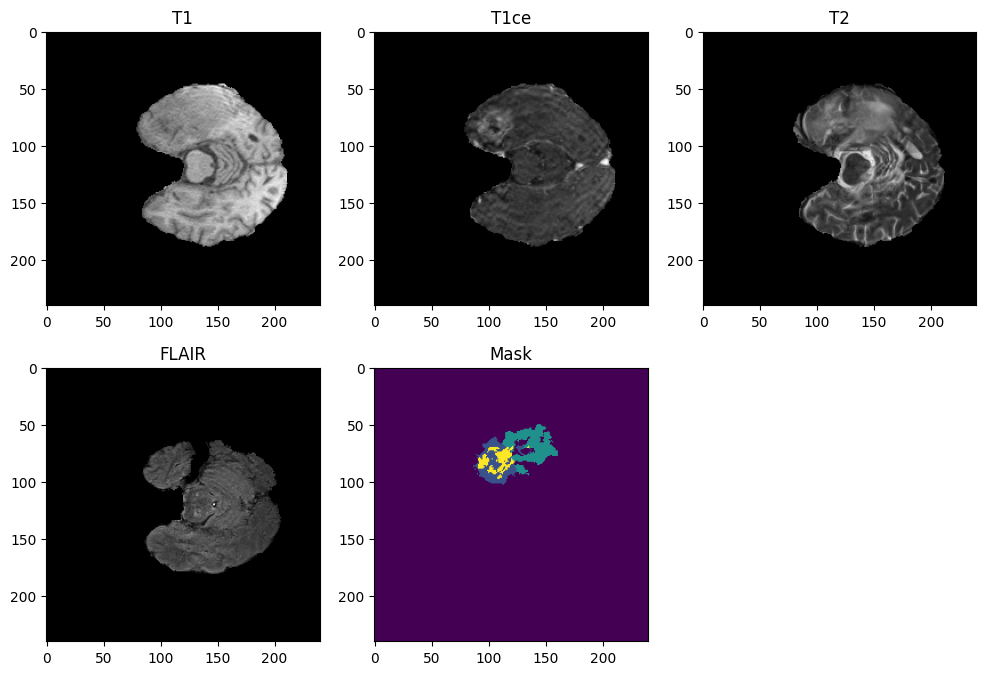

In [17]:
import matplotlib.pyplot as plt

slice = 45

print("Slice Number: " + str(slice))

plt.figure(figsize=(12, 8))

# T1
plt.subplot(2, 3, 1)
plt.imshow(test_image_t1[:, :, slice], cmap='gray')
plt.title('T1')

# T1ce
plt.subplot(2, 3, 2)
plt.imshow(test_image_t1ce[:, :, slice], cmap='gray')
plt.title('T1ce')

# T2
plt.subplot(2, 3, 3)
plt.imshow(test_image_t2[:, :, slice], cmap='gray')
plt.title('T2')

# Flair
plt.subplot(2, 3, 4)
plt.imshow(test_image_flair[:, :, slice], cmap='gray')
plt.title('FLAIR')

# Mask
plt.subplot(2, 3, 5)
plt.imshow(test_image_seg[:, :, slice])
plt.title('Mask')
plt.show()

In [18]:
# Modality shape
print("Modality: ", test_image_t1.shape)

# Segmentation shape
print("Segmentation: ", test_image_seg.shape)

Modality:  (240, 240, 155)
Segmentation:  (240, 240, 155)
